# *Softmax* 

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
data = pd.read_csv('/kaggle/input/softmaxdata/Iris.csv')
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
data.columns = ['ID', 'X0', 'X1', 'X2', 'X3', 'Y']
X = np.array([data['X0'], data['X1'], data['X2'], data['X3']])
X = X.T
y = np.array(data['Y'])
data.sample(20)

,ID,X0,X1,X2,X3,Y
27,28,5.2,3.5,1.5,0.2,0
38,39,4.4,3.0,1.3,0.2,0
28,29,5.2,3.4,1.4,0.2,0
83,84,6.0,2.7,5.1,1.6,1
131,132,7.9,3.8,6.4,2.0,2
115,116,6.4,3.2,5.3,2.3,2
81,82,5.5,2.4,3.7,1.0,1
39,40,5.1,3.4,1.5,0.2,0
125,126,7.2,3.2,6.0,1.8,2
53,54,5.5,2.3,4.0,1.3,1


In [138]:
data = pd.read_csv('/kaggle/input/softmaxdata/Iris.csv')
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
data.columns = ['ID', 'X0', 'X1', 'X2', 'X3', 'Y']
X = np.array([data['X0'], data['X1'], data['X2'], data['X3']])
X = X.T
y = np.array(data['Y'])
data.sample(20)
def oneHotEncoding(y, numClass):
    m = y.shape[0] # m = 150
    yOneHot = np.zeros((m, numClass)) # ma trận 150 * 3 toàn số 0
    yOneHot[np.arange(m), y] = 1 # m là ma trận từ 0 -> 149 và y là ma trận 150 số từ 0 -> 2
    return yOneHot
def crossEntropyLoss(y, yPre):
    m = y.shape[0]
    logLikelihood = -np.sum(y * np.log(yPre))
    loss = np.sum(logLikelihood) / m
    return loss
def softmax(z):
    ez = np.exp(z - np.max(z))
    return ez/ez.sum(axis=1, keepdims=True)
def gradientDescent(X, y, w, learningRate, epochs):
    m = X.shape[0]
    losses = []
    for it in range(epochs):
        z = np.dot(X, w)
        yPre = softmax(z)
        loss = crossEntropyLoss(y, yPre)
        losses.append(loss)
        dW = np.dot(X.T, (yPre - y)) / m
        w -= learningRate * dW
        if it % 100 == 0:
            print(f'Loss: {loss}')

    return w, losses
def predict(X, w): #hàm dự đoán test xem độ chính xác
    z = np.dot(X, w)
    yPre = softmax(z)
    return np.argmax(yPre, axis=1)


numClass = 3 # tức là y chỉ có các giá trị 0, 1, 2 
y = oneHotEncoding(y, numClass) # cho giá trị 0 là 1000, 1 là 0100, 2 là 0010
w = np.random.randn(X.shape[1], numClass) # tạo ra ma trận w với các giá trị ngẫu nhiên 4 * 3
learningRate = 0.5
epochs = 1000
finalW, losses = gradientDescent(X, y, w, learningRate, epochs) # tìm ra w cuối cùng
xPredict = [[6.1,	3.0,	4.9,	1.8]] # lấy bừa sô ID 128 để cho vào mô hình xem nó đoán đúng chưa, thì thấy nó đoán là 2 == với nhãn đã cho trước => đúng
predictions = predict(xPredict, finalW)
print(predictions)



Loss: 7.961244528155268
Loss: 1.5427631733131923
Loss: 1.3626472289049532
Loss: 0.07964650119163603
Loss: 0.07790082131407775
Loss: 0.07677600763709207
Loss: 0.07597562573927684
Loss: 0.07537476093511432
Loss: 0.07490855049619285
Loss: 0.07453862056291484
[2]


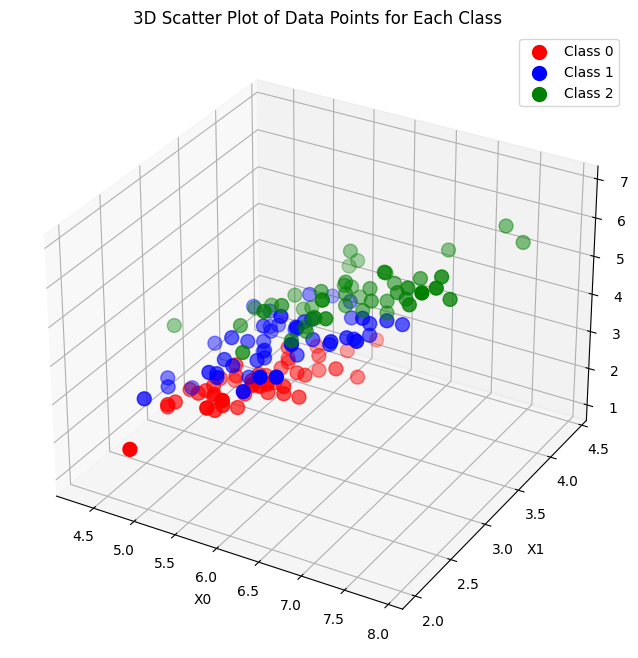

In [139]:
# import numpy as np
# import matplotlib.pyplot as plt
# x0, x1, x2 = [], [], []

# for i in range(len(y)):
#     if np.argmax(y[i]) == 0:
#         x0.append(X[i])
#     elif np.argmax(y[i]) == 1:
#         x1.append(X[i])
#     else:
#         x2.append(X[i])

# x0 = np.array(x0)
# x1 = np.array(x1)
# x2 = np.array(x2)

# # Plotting the 3D scatter plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot for each class
# ax.scatter(x0[:, 0], x0[:, 1], x0[:, 2], c='red', label='Class 0', s=100)
# ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2], c='blue', label='Class 1', s=100)
# ax.scatter(x2[:, 0], x2[:, 1], x2[:, 2], c='green', label='Class 2', s=100)

# # Adding labels and title
# ax.set_xlabel('X0')
# ax.set_ylabel('X1')
# ax.set_zlabel('X2')
# ax.set_title('3D Scatter Plot of Data Points for Each Class')

# # Show legend
# ax.legend()

# # Show plot
# plt.show()
